# After the experiments are conducted and the results saved I want to analyse them here in a different notebook

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import time
import operator

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

from mylib.my_xgb import BinaryDecisionTree as BDT
from mylib.my_xgb import add_class

import dtreeviz
import logging
# to suppress messages when plotting trees
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [6]:
# open file

data_folder = Path("../../../data/DryBeanDataset/")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [3]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
data["Class"] = data["Class"].map(labels_dict)
#data.Class.astype("category").cat.codes

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

In [4]:
label_proportions = class_distributions.label_proportions(labels)
print(label_proportions)

largest_class_label = max(label_proportions.items(), key=operator.itemgetter(1))[0]
smallest_class_label = min(label_proportions.items(), key=operator.itemgetter(1))[0]

6    0.260525
5    0.193667
0    0.148924
4    0.141650
3    0.119756
1    0.097127
2    0.038351
Name: Class, dtype: float64


# Largest Class

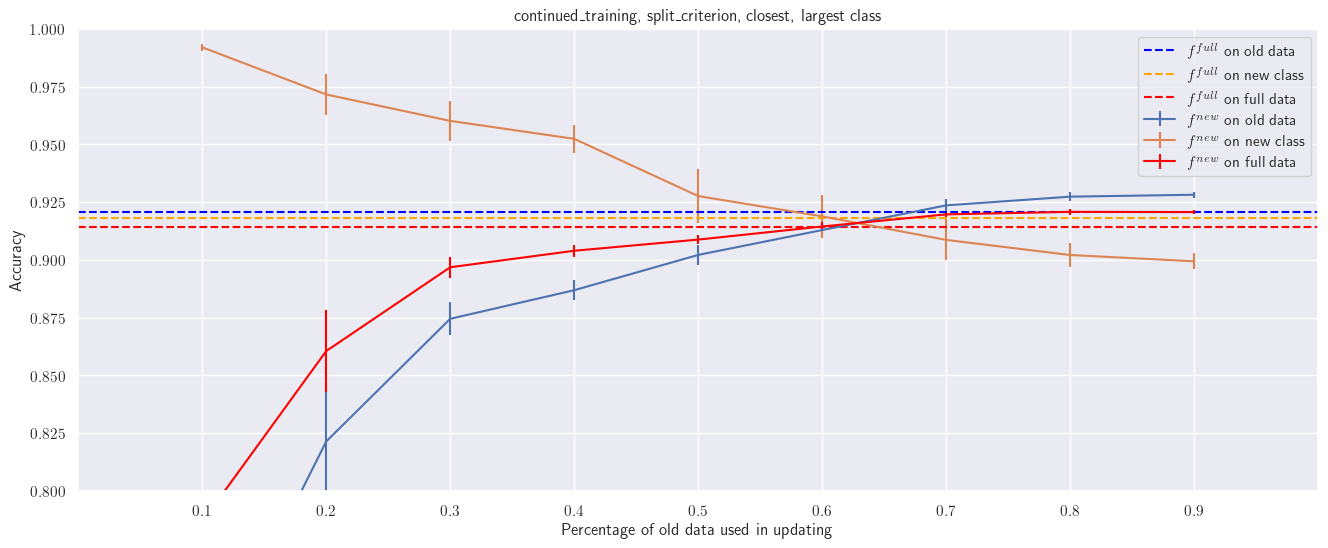

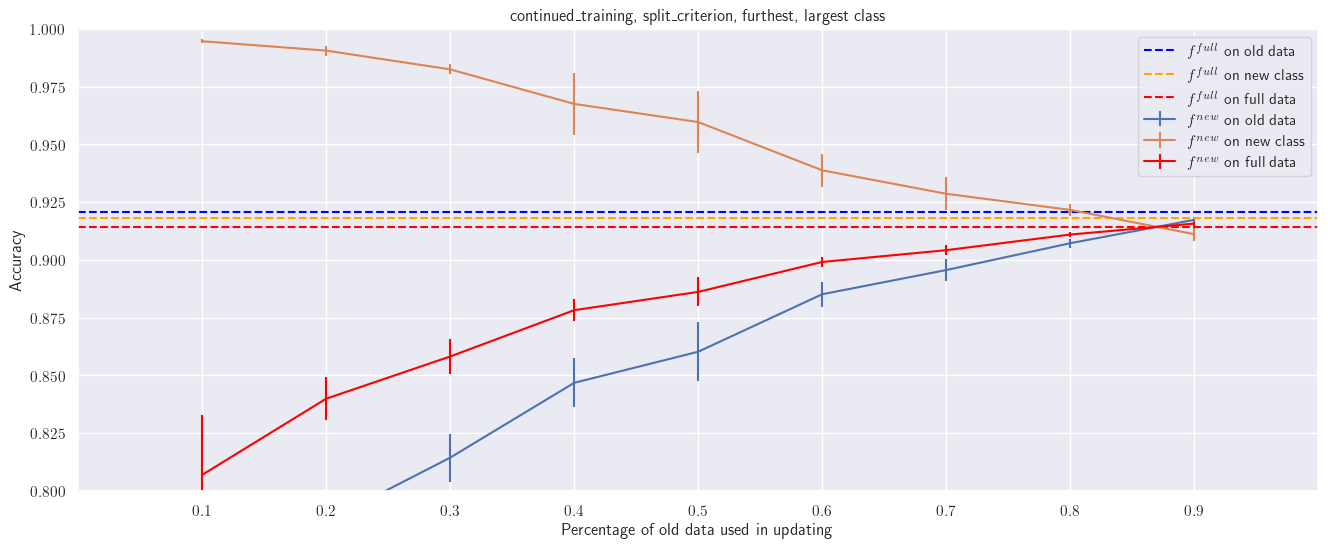

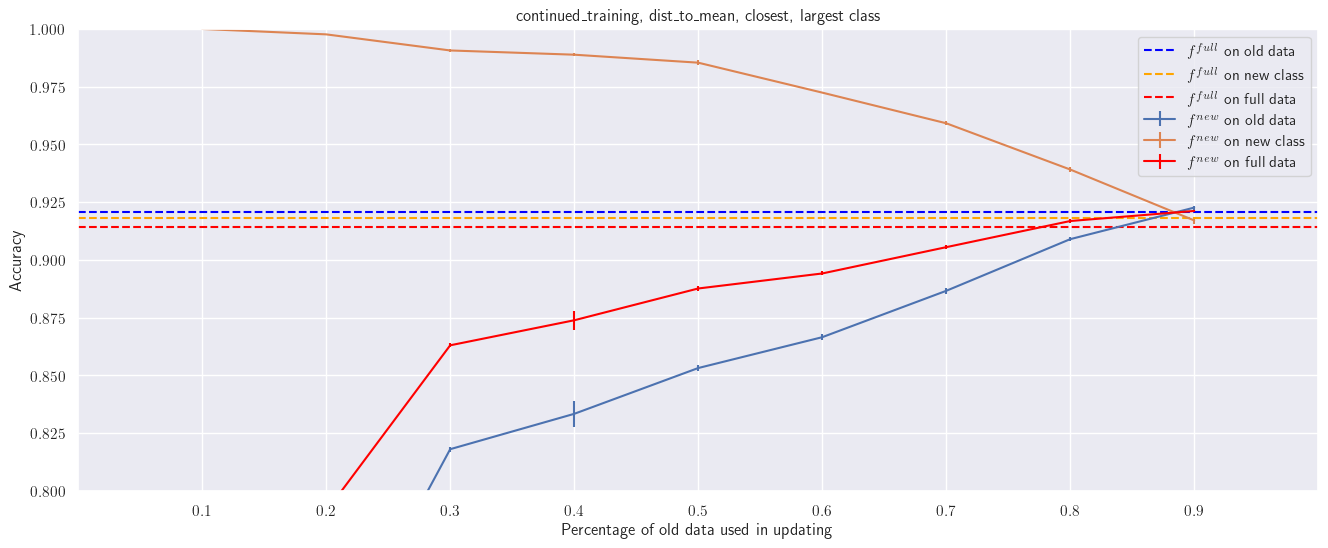

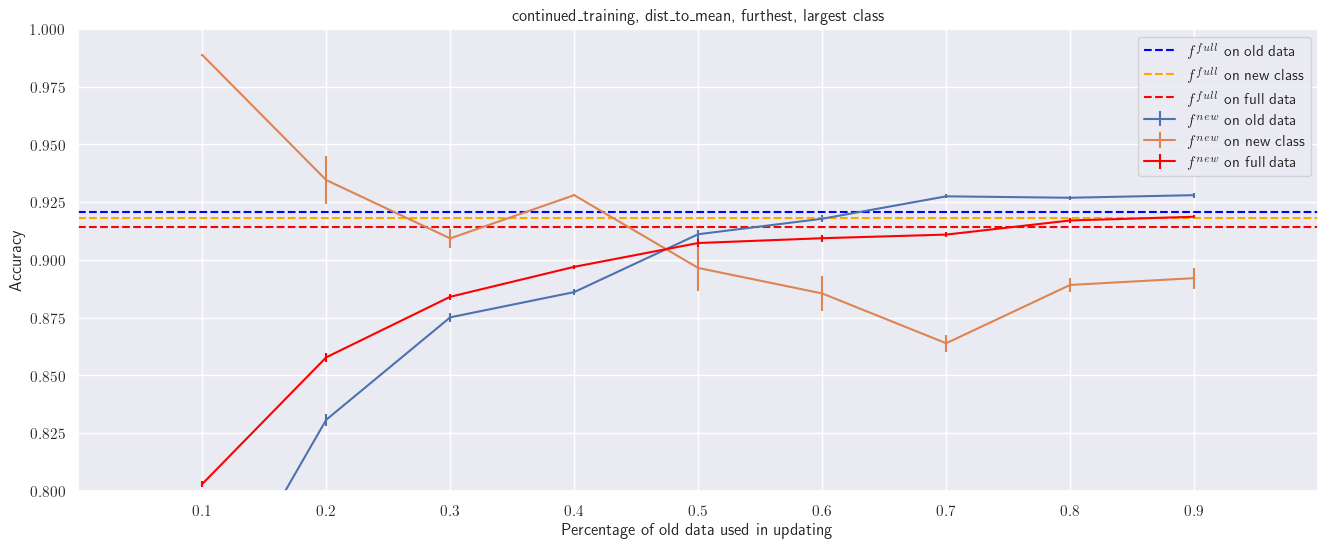

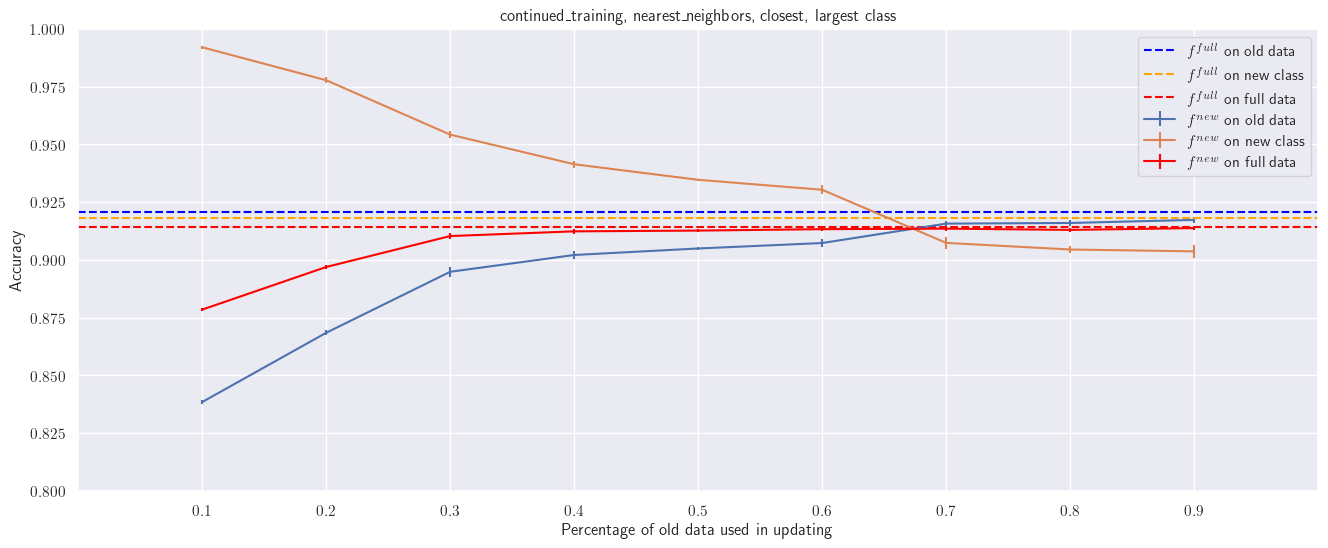

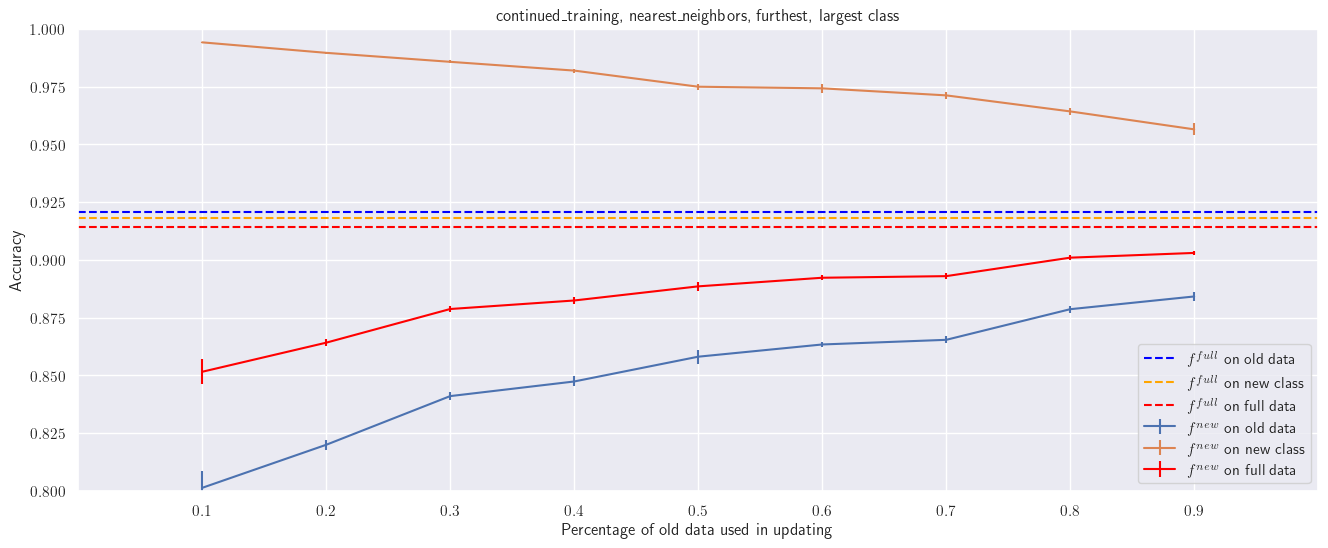

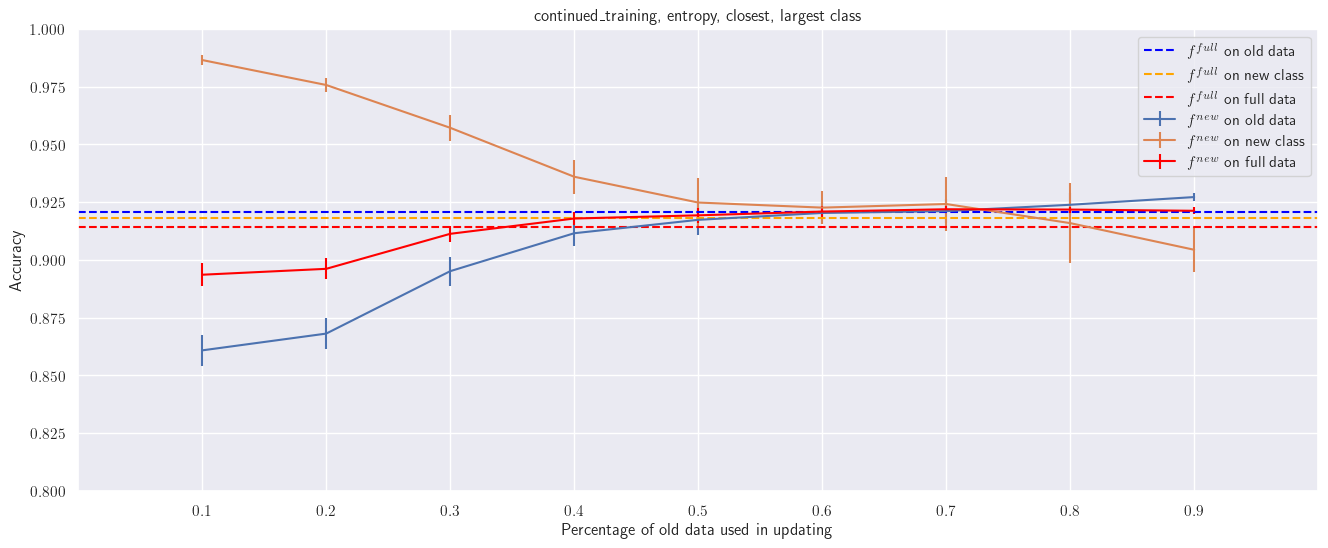

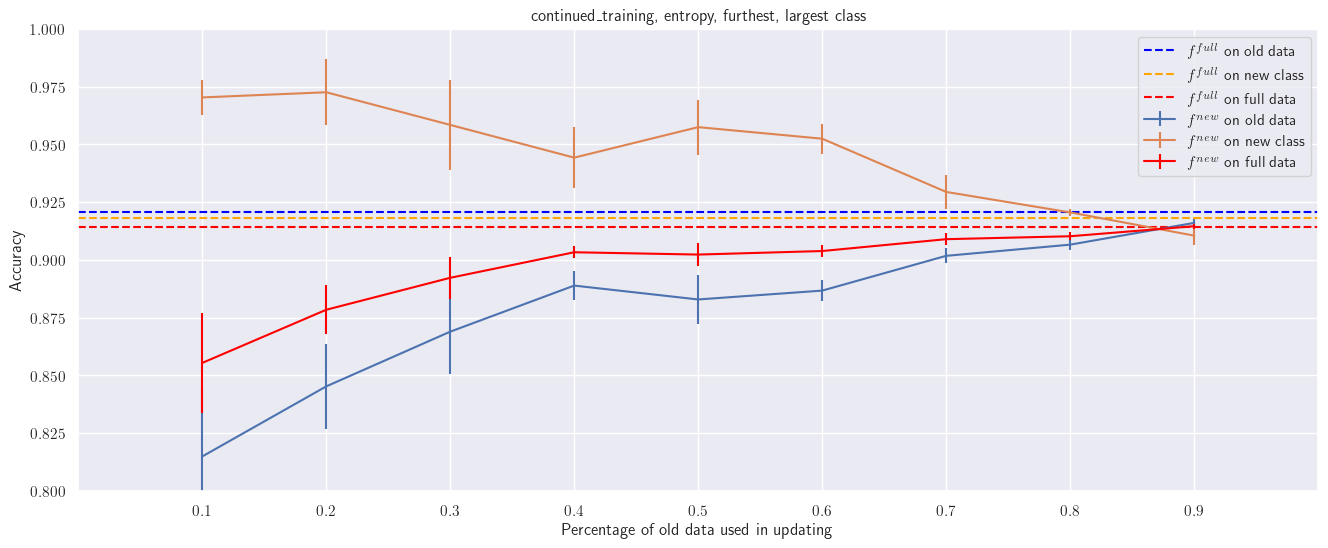

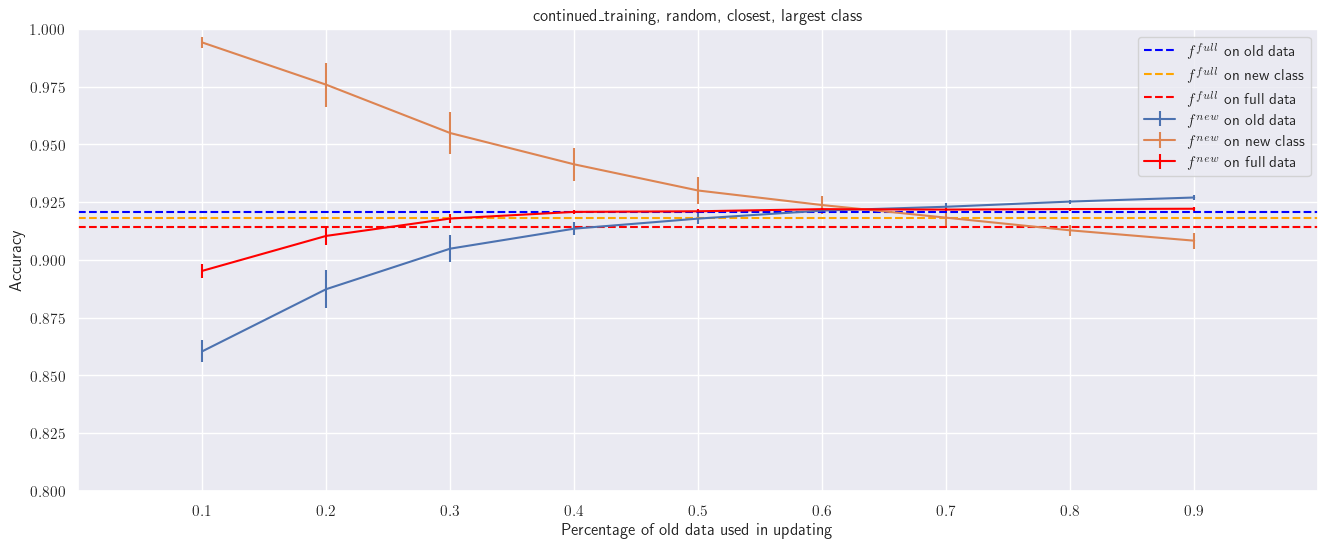

In [10]:
new_class_idx = largest_class_label
largest_or_smallest_class = 'largest class'

batch_results = helper_funcs.unpack_batch_results("continued_training", largest_or_smallest_class)

for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
    for sort_type in ['closest', 'furthest']:
        experiment_results = helper_funcs.unpack_results("continued_training", data_selection_method, sort_type, largest_or_smallest_class)
        helper_funcs.plot_results("continued_training", experiment_results, batch_results, data_selection_method, sort_type, largest_or_smallest_class, save=True)

# and once for random method
experiment_results = helper_funcs.unpack_results("continued_training", 'random', 'closest', largest_or_smallest_class)
helper_funcs.plot_results("continued_training", experiment_results, batch_results, 'random', 'closest', largest_or_smallest_class, save=True)

# Smallest Class

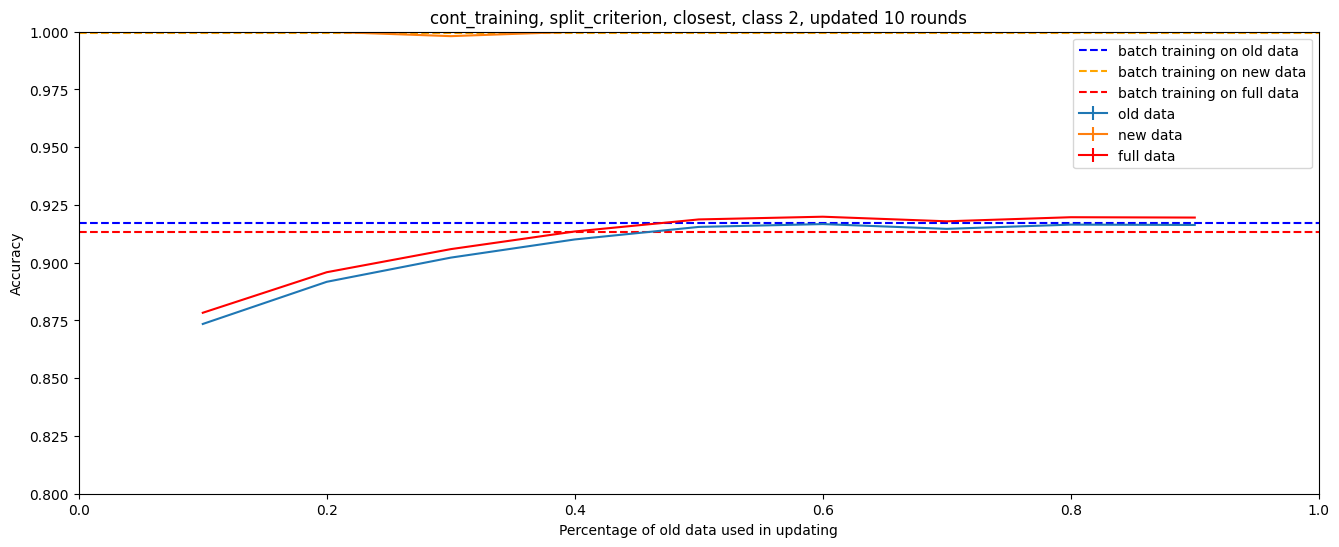

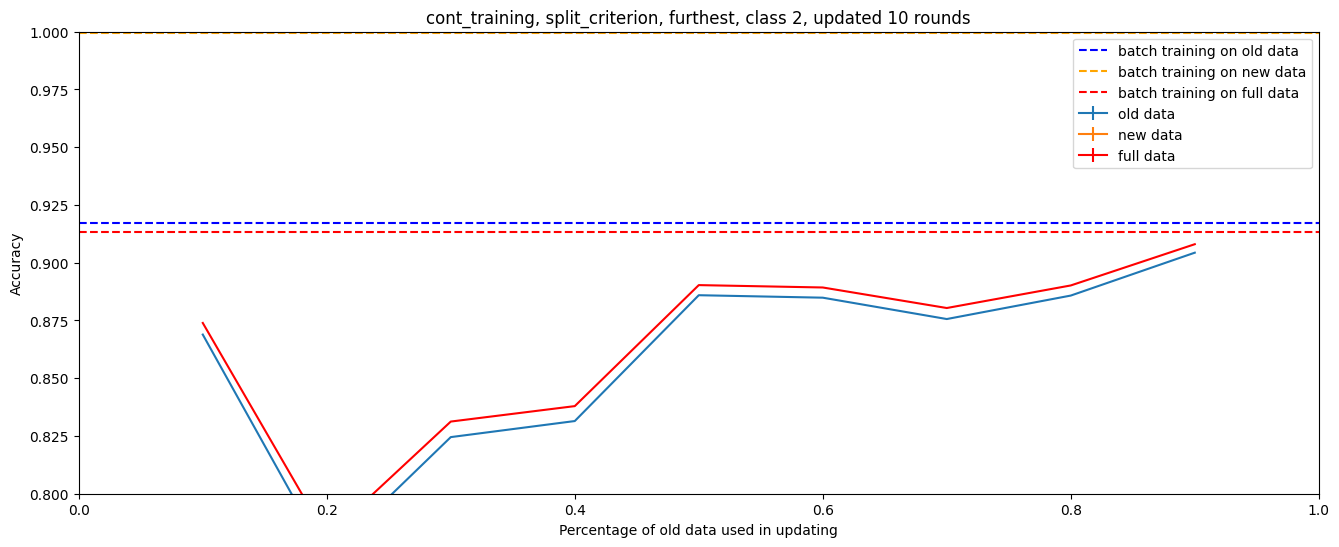

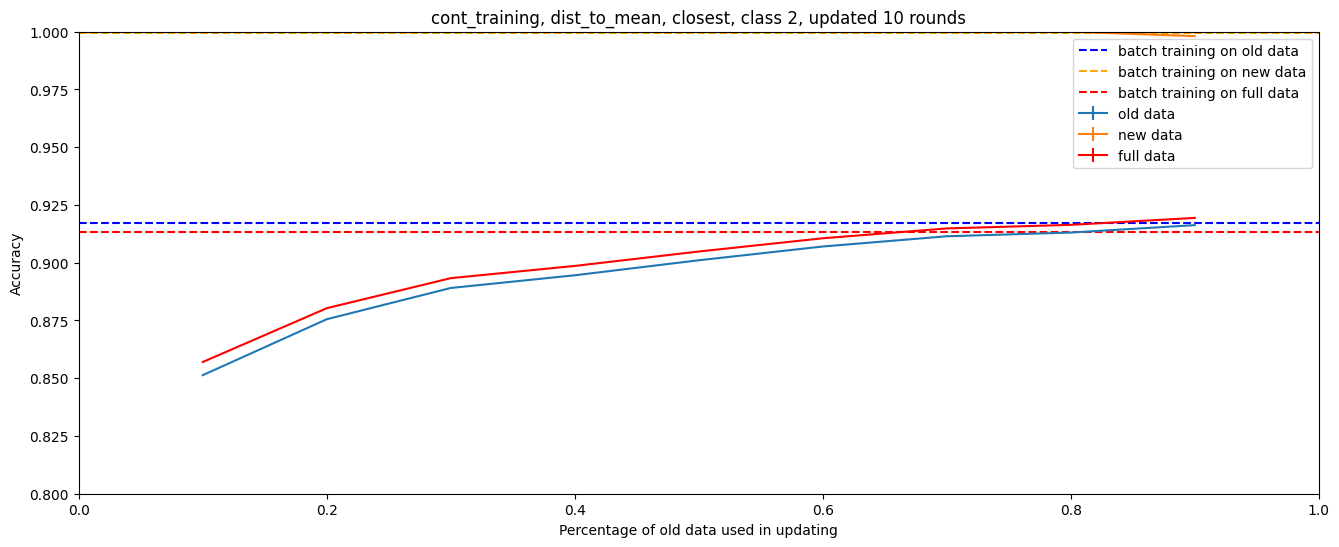

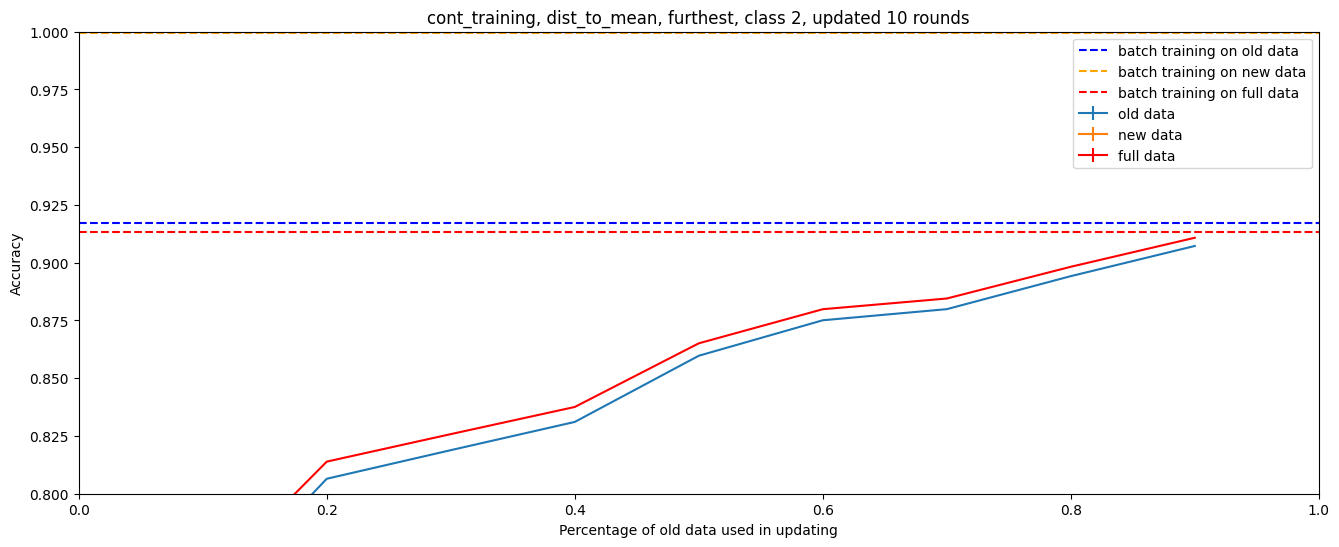

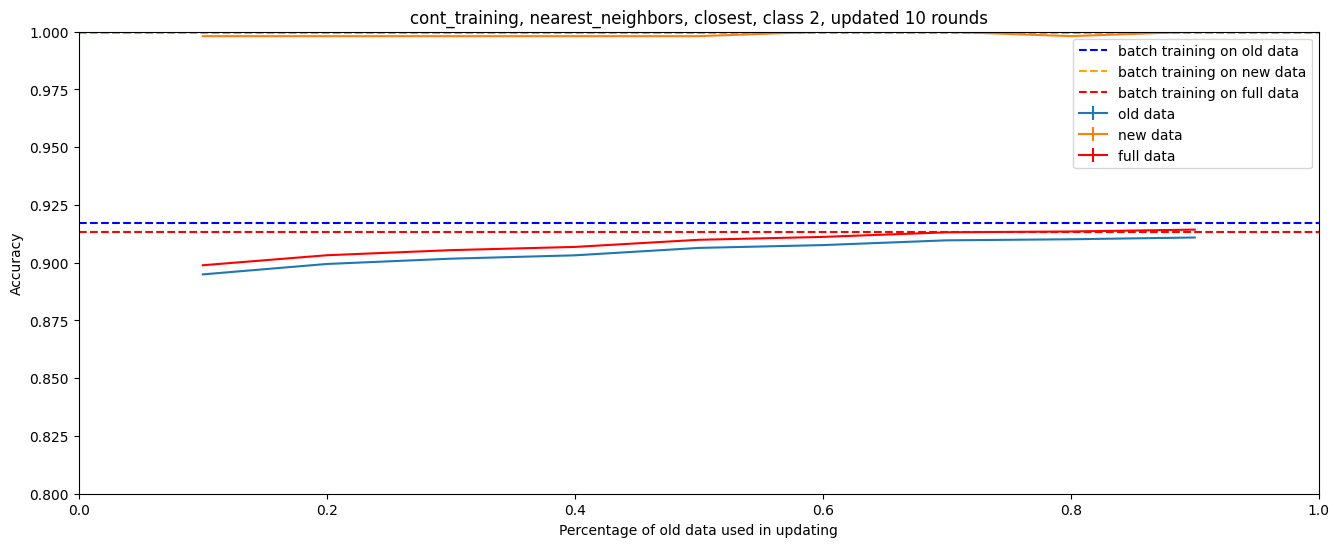

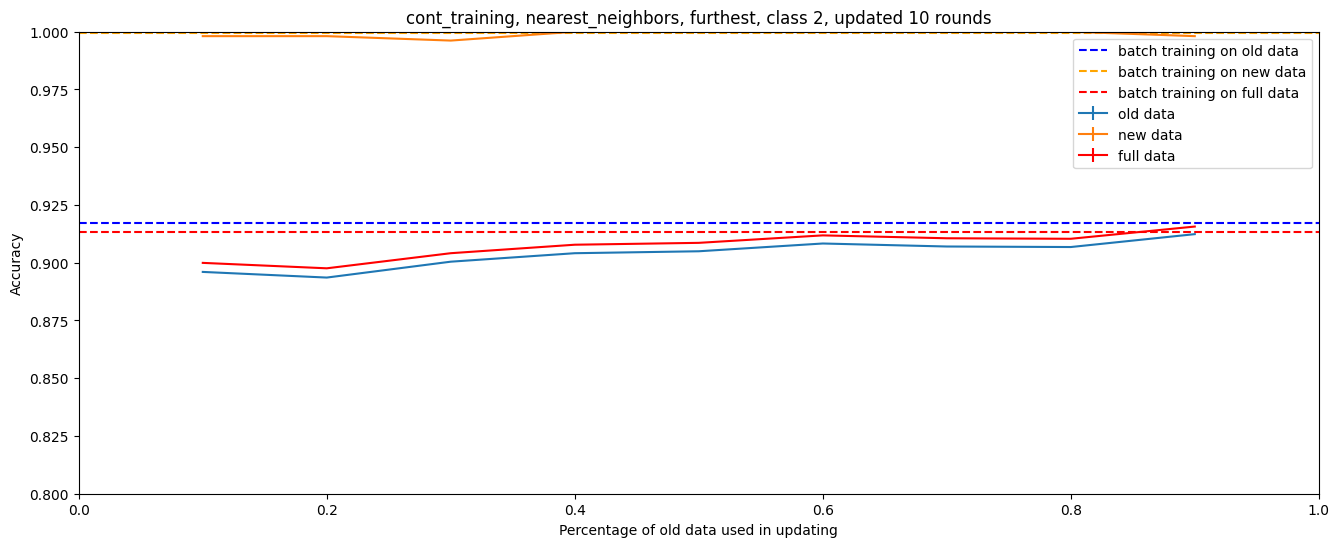

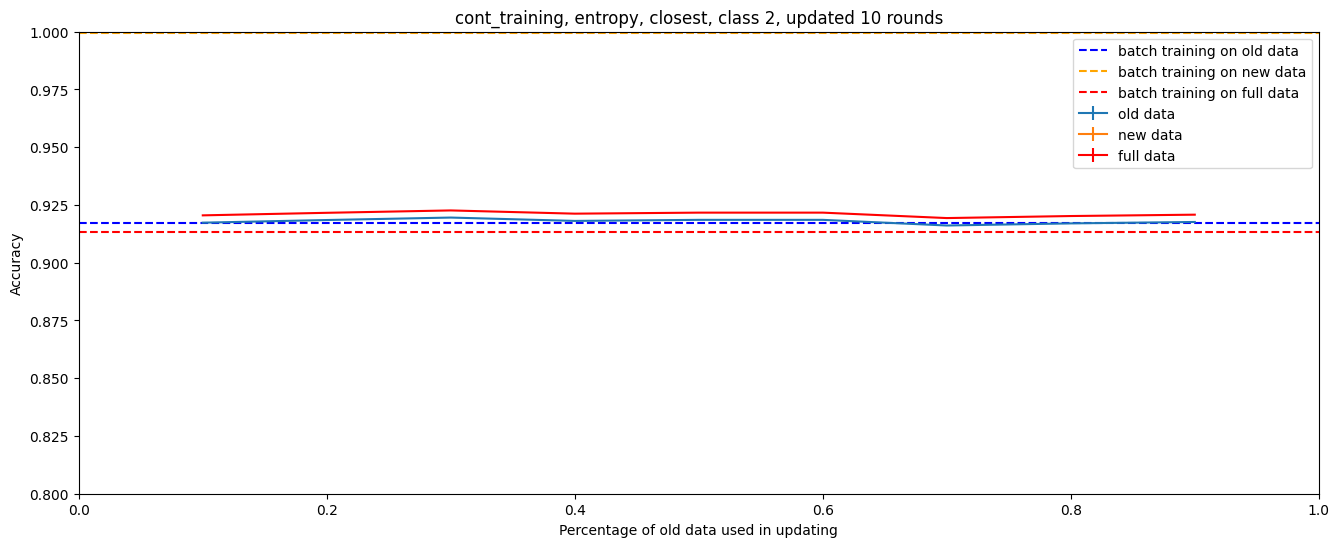

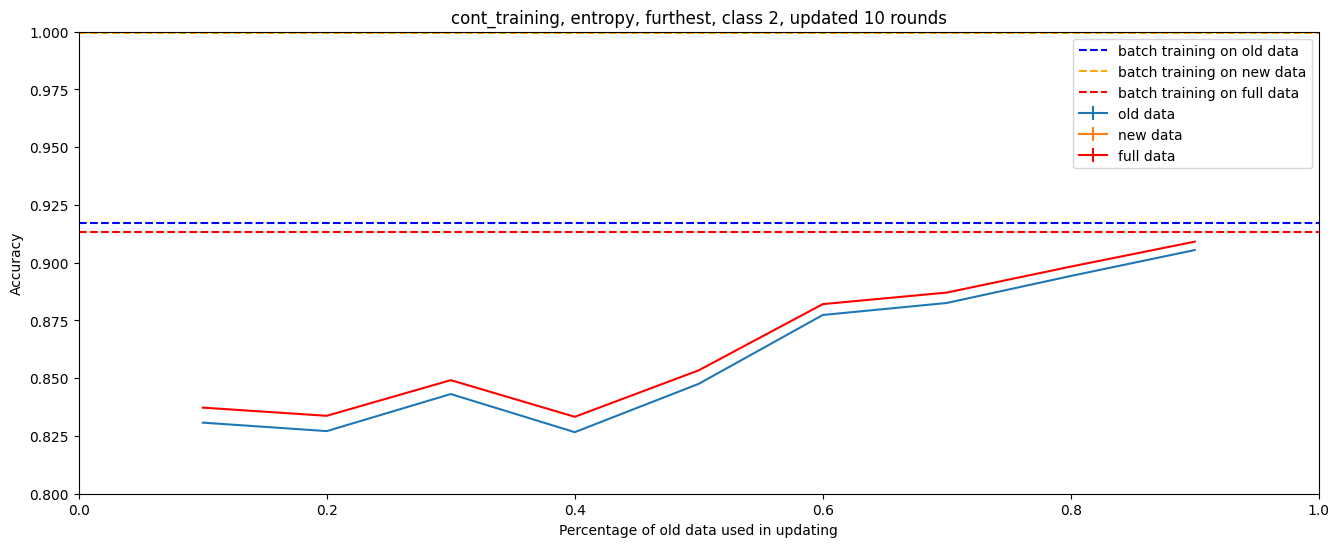

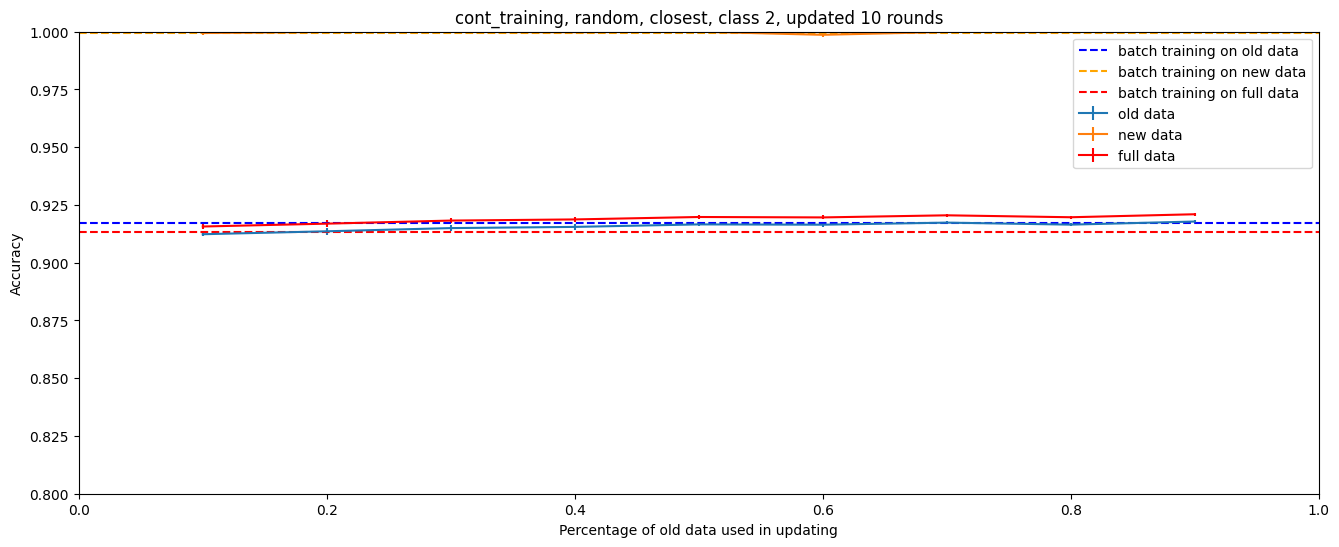

In [10]:
new_class_idx = smallest_class_label

batch_results = helper_funcs.unpack_batch_results("continued_training", new_class_idx)

for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
    for sort_type in ['closest', 'furthest']:
        experiment_results = helper_funcs.unpack_results("continued_training", data_selection_method, sort_type, new_class_idx)
        helper_funcs.plot_results("continued_training", experiment_results, batch_results, data_selection_method, sort_type, new_class_idx, save=True)

# and once for random method
experiment_results = helper_funcs.unpack_results("continued_training", 'random', 'closest', new_class_idx)
helper_funcs.plot_results("continued_training", experiment_results, batch_results, 'random', 'closest', new_class_idx, save=True)